In [124]:
from numpy import linspace, ones, arange,array,random,zeros,meshgrid
import matplotlib.pyplot as plt
from Biblio_spline import find_span, nth_Derv_basis_functs, make_knots,basis_funct, plot_R_surface_2D
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Let $T=\left\{t_i\right\}_{i=0}^{m}$ be a non decreasing sequence of real numbers,
the j-th B-spline of degree $p$ is defined by the recurrence relation:
$$
B_j^p=\frac{t-t_j}{t_{j+p}-t_j} B_j^{p-1}+\frac{t_{j+p+1}-t}{t_{j+p+1}-t_{j+1}} B_{j+1}^{p-1},
$$
where
$$
B_j^0(t)=\chi_{\left[t_j, t_{j+1}[\right.}(t) $$ 
for $0 \leq j \leq m-p-1$.


In [125]:
p =2
ne=4
t=0.44
i=3
grid=linspace(0,1,ne+1)
T=make_knots(grid,p)
print(T)

print(basis_funct(t,p,T,i))
sum(basis_funct(t,p,T,i))
   

[0.0, 0.0, 0.0, 0.25, 0.5, 0.75, 1.0, 1.0, 1.0]
[0.0288 0.6824 0.2888]


1.0

In [126]:
#Exemple for Basis Bspline 
p = 2
ne =6
grid = linspace(0,6,ne+1)
knots = make_knots(grid,p)
knots.insert(6,4.0)
print(knots)
#test fct b spline basis
t=5/2
i=4
B=basis_funct(t,p,knots,i)
print(B)
#wE VERIFY THE Partion Unity 
print(sum(B))

[0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0, 6.0, 6.0, 6.0]
[0.125 0.75  0.125]
1.0


In [127]:
plt.figure(figsize=(6,3.5))
def plot_bassis_function(knots,degree,nx=101):
    x_min=knots[degree]
    x_max=knots[-degree-1]
    x_s=linspace(x_min,x_max,nx)
    nspline=len(knots)-degree-1# NOMBRE DE FONCTION DE BASE Bspline 
    P=zeros((nx,nspline))
    for i,xi in enumerate(x_s):
        ispan=find_span(knots,xi,degree)
        values_xi=basis_funct(xi,degree,knots,ispan)
        P[i,ispan-degree:ispan+1]+=values_xi
    
    for j in range(nspline):
        plt.plot(x_s,P[:,j],label=r'$N_{}^{}$'.format(j,degree))
        plt.legend(loc='best')
    plt.grid()
    # if os.path.exists('Bspline_p=0.png'):
    #     os.remove('Bspline_p=0.png')
    plt.savefig('Bspline_p=0.png')
    plt.show()

<Figure size 600x350 with 0 Axes>

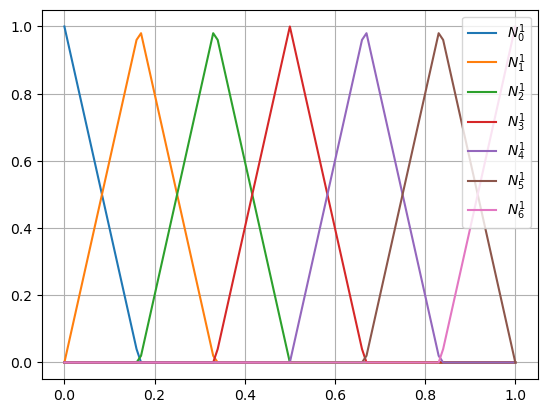

In [129]:
p = 1
ne =6
grid =  linspace(0,1,ne+1)
knots =  make_knots(grid,p)
plot_bassis_function(knots,p,nx=101)

[0.0, 0.0, 1.0, 1.0]
4


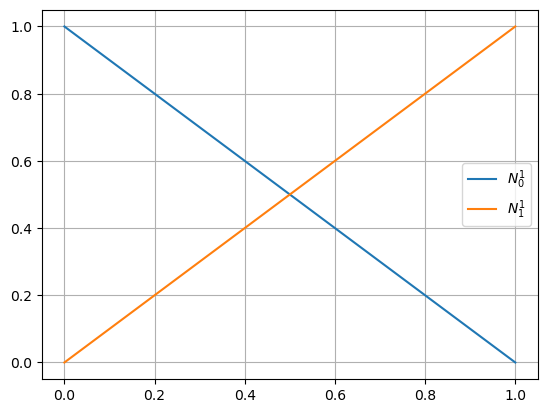

In [130]:

p = 1
ne = 1
# knots = [0.0, 0.0,1.0 , 1.0]
grid = linspace(0,1,ne+1)
knots = make_knots(grid,p)
print(knots)
print(len(knots))
plot_bassis_function(knots,p)


[0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
6


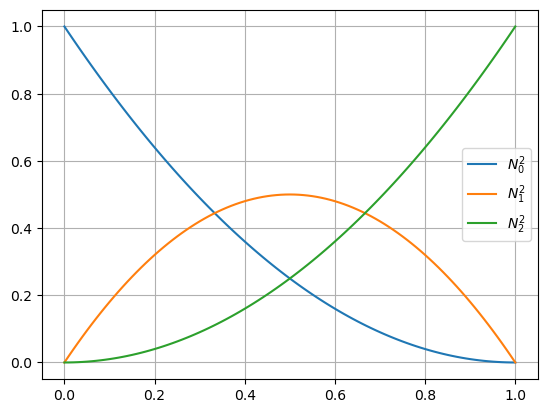

In [131]:

p = 2
ne = 1
grid = linspace(0,1,ne+1)
knots = make_knots(grid,p)
print(knots)
print(len(knots))
plot_bassis_function(knots,p)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 4.0, 6.0]


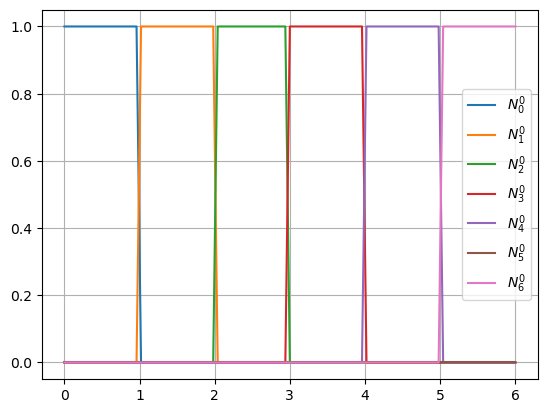

In [132]:
p = 0
ne =6
grid = linspace(0,6,ne+1)
knots = make_knots(grid,p)
knots.insert(6,4.0)
print(knots)
plot_bassis_function(knots,p)

[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0, 6.0, 6.0]


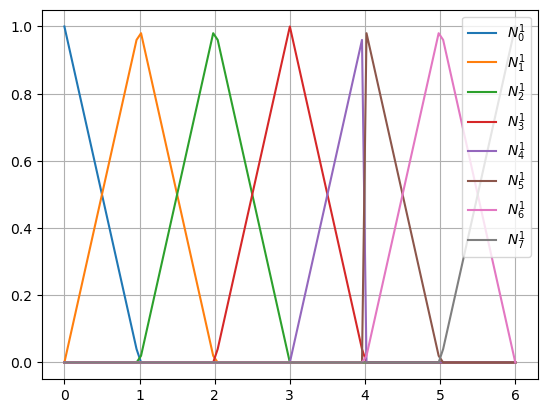

In [133]:
p = 1
ne =6
grid = linspace(0,6,ne+1)
knots = make_knots(grid,p)
knots.insert(6,4.0)
print(knots)
#when we insert one knots the regularity decreses to C-1 that we see at knots 4.0
plot_bassis_function(knots,p)

[0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0, 6.0, 6.0, 6.0]


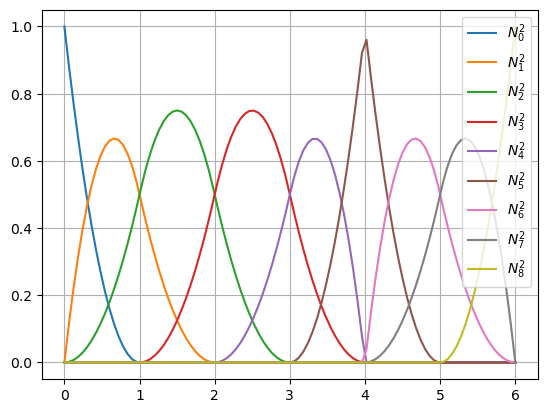

In [134]:


p = 2
ne =6
nd= 5# qd p>nd la derive=
grid = linspace(0,6,ne+1)
knots = make_knots(grid,p)
knots.insert(6,4.0)
print(knots)
#when we insert one knots the regularity decreses to C-1 that we see at knots 4.0
plot_bassis_function(knots,p)

The derivative of a basis function is given by:
$$
B_{i, p}^{\prime}(t)=\frac{p}{t_{i+p}-t_i} B_{i, p-1}(t)-\frac{p}{t_{i+p+1}-t_{i+1}} B_{i+1, p-1}(t) 
$$


In [135]:
p =2
ne=4
t=0.44
nd=2
grid=linspace(0,1,ne+1)
knots=make_knots(grid,p)
#knots.insert(6,4)
A=nth_Derv_basis_functs(t, p, nd, knots)
A

array([[ 2.880e-02,  6.824e-01,  2.888e-01],
       [-9.600e-01, -2.080e+00,  3.040e+00],
       [ 1.600e+01, -3.200e+01,  1.600e+01]])

In [136]:
i=4
t=5/2
p = 2
ne =6
nd= 5
grid = linspace(0,6,ne+1)
knots = make_knots(grid,p)
knots.insert(6,4.0)
print(knots)
deri=nth_Derv_basis_functs(t, p, nd, knots)
print(deri)

[0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0, 6.0, 6.0, 6.0]
[[ 0.125  0.75   0.125]
 [-0.5    0.     0.5  ]
 [ 1.    -2.     1.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]]


Example 1:We consider the quadratic Rational Bezier curve, where the weights are given by $w_0=1, w_1=1$ and $w_2=2$ and the control points are $\mathbf{P}_0=\left(\begin{array}{l}1 \\ 0\end{array}\right), \mathbf{P}_1=\left(\begin{array}{l}1 \\ 1\end{array}\right)$ and $\mathbf{P}_2=\left(\begin{array}{l}0 \\ 1\end{array}\right)$. This leads to a representation of the circular arc, using the parametric form $\mathcal{C}(t)=\left(\begin{array}{c}\frac{1-t^2}{1+t^2} \\ \frac{2 t}{1+t^2}\end{array}\right)$.

In [137]:
def plot(knots,degree,alpha,nx):
    t=linspace(knots[degree],knots[-degree-1],nx)
    P=zeros((len(alpha),1))
    P[:,0]= alpha[:]
    Q = zeros((nx,1))
    for i,xi in enumerate(t):
        C = zeros(P.shape[-1])
        ispan=find_span(knots,xi,degree)
        values_xi=basis_funct(xi,degree,knots,ispan)
        for jk in range(degree+1):
            C[:] += values_xi[jk]*P[ispan-degree+jk,:]
        Q[i,:]=C[:]
    
    plt.plot(t,Q[:,0])
    #return Q[:,0]


## B_Spline Curves

In [138]:
def plot(knots,degree,alpha,nx):
    t=linspace(knots[degree],knots[-degree-1],nx)
    P=zeros((len(alpha),1))
    P[:,0]= alpha[:]
    Q = zeros((nx,1))
    for i,xi in enumerate(t):
        C = zeros(P.shape[-1])
        ispan=find_span(knots,xi,degree)
        values_xi=basis_funct(xi,degree,knots,ispan)
        for jk in range(degree+1):
            C[:] += values_xi[jk]*P[ispan-degree+jk,:]
        Q[i,:]=C[:]
    return Q[:,0]    

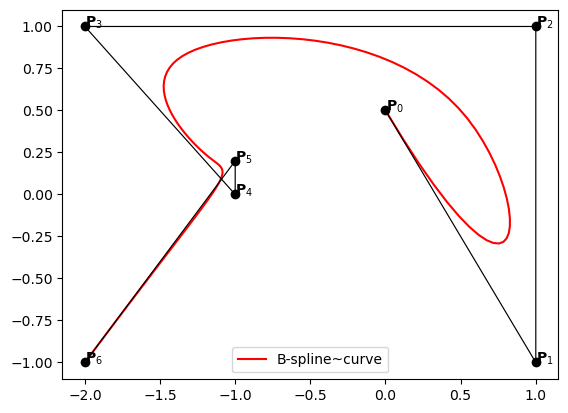

In [139]:
knots  = [0., 0., 0., 0., 0.25, 0.5, 0.75, 1., 1., 1., 1.]
degree = 3
n      = len(knots) - degree - 1 # n = nombre  de fonction de base
P = zeros((n, 2))
nx =100
ny = 100
alpha_x = [0.,  1., 1., -2., -1., -1., -2.]
alpha_y = [.5, -1., 1.,  1.,  0.,  0.2, -1.]   
Px    = plot(knots,degree,alpha_x,nx)
Py    = plot(knots,degree,alpha_y,ny)
plt.plot(Px,Py,lw = 1.5, label='B-spline~curve',color = "red")
plt.plot(alpha_x, alpha_y, '-ok', lw = 0.85)
for j in range(n):
      x = alpha_x[j]
      y = alpha_y[j]
      plt.text(x+0.0005, y+0.0005,'$\mathbf{P}_{' + str(j) + '}$')
plt.legend()

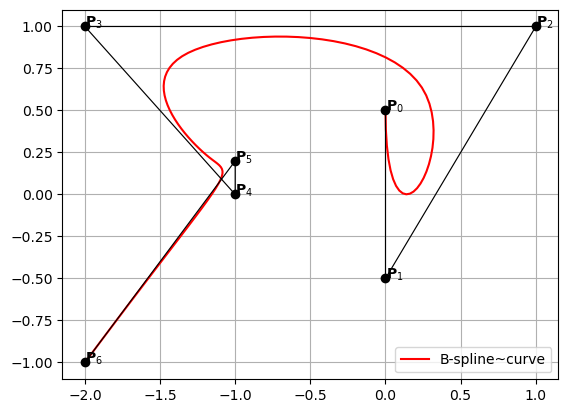

In [140]:
knots  = [0., 0., 0., 0., 0.25, 0.5, 0.75, 1., 1., 1., 1.]
degree = 3
n      = len(knots) - degree - 1 # n = nombre  de fonction de base
P = zeros((n, 2))
nx =100
ny = 100
alpha_x = [0.,  0., 1., -2., -1., -1., -2.]
alpha_y = [.5, -0.5, 1.,  1.,  0.,  0.2, -1.]   
Px    = plot(knots,degree,alpha_x,nx)
Py    = plot(knots,degree,alpha_y,ny)
plt.plot(Px,Py,lw = 1.5, label='B-spline~curve',color = "red")
plt.plot(alpha_x, alpha_y, '-ok', lw = 0.85)
for j in range(n):
      x = alpha_x[j]
      y = alpha_y[j]
      plt.text(x+0.0005, y+0.0005,'$\mathbf{P}_{' + str(j) + '}$')
plt.legend()
plt.grid()
plt.savefig('Modifiedcontrolepolygone.png')
plt.show()

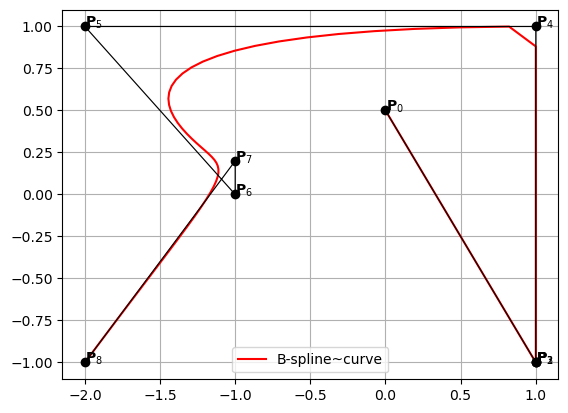

In [141]:
knots  = [0., 0., 0., 0., 0.25, 0.5,0.5,0.5, 0.75, 1., 1., 1., 1.]
degree = 3
n      = len(knots) - degree - 1 # n = nombre  de fonction de base
P = zeros((n, 2))
nx =100
ny = 100
# P[:, 0] = [0.,  1., 1., -2., -1., -1., -2.]
# P[:, 1] = [.5, -1., 1.,  1.,  0.,  0.2, -1.]   
alpha_x = [0.,  1., 1, 1., 1, -2., -1., -1., -2.]
alpha_y = [0.5, -1.,-1,-1 ,1.,  1.,  0.,  0.2, -1.]   
# POUR QUI IL SOIT LA COURBE CONFonDUE AVEC LE POLYGONE DE CONTROLE IL FAUT INSERER UN NOEUD ET UN PT DE CONTOLE DANS LE POLGH+ON E
Px    = plot(knots,degree,alpha_x,nx)
Py    = plot(knots,degree,alpha_y,ny)
plt.plot(Px,Py,lw = 1.5, label='B-spline~curve',color = "red")
plt.plot(alpha_x, alpha_y, '-ok', lw = 0.85)
for j in range(n):
      x = alpha_x[j]
      y = alpha_y[j]
      plt.text(x+0.0005, y+0.0005,'$\mathbf{P}_{' + str(j) + '}$')
plt.legend()
plt.grid()
plt.savefig("Quadratic_Curve_deg2_ins.png")
plt.show()

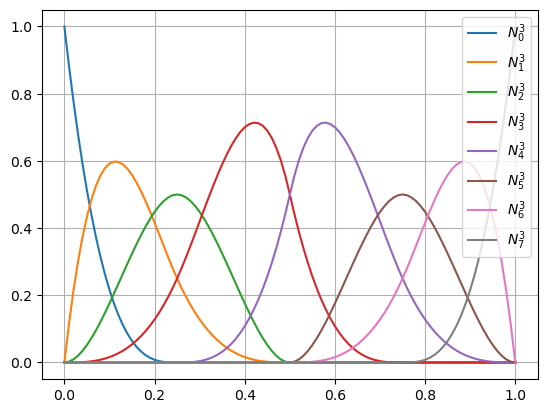

In [142]:
knots  = [0., 0., 0., 0., 0.25, 0.5,0.5, 0.75, 1., 1., 1., 1.]
degree = 3

def plot_bassis_function(knots,degree,nx=101):
    x_min=knots[degree]
    x_max=knots[-degree-1]
    x_s=linspace(x_min,x_max,nx)
    nspline=len(knots)-degree-1
    P=zeros((nx,nspline))
    for i,xi in enumerate(x_s):
        ispan=find_span(knots,xi,degree)
        values_xi=basis_funct(xi,degree,knots,ispan)
        P[i,ispan-degree:ispan+1]+=values_xi
    
    for j in range(nspline):
        plt.plot(x_s,P[:,j],label=r'$N_{}^{}$'.format(j,degree))
        plt.legend(loc='best')
        
plot_bassis_function(knots,degree,nx=101)
plt.grid()
plt.savefig("Cubic_BSPLINEFuncftio.png")

plt.show()

## BSpline Surfaces 


In [143]:
def plot_surface_2D(knots_1, knots_2, alpha, degree_1, degree_2, nx = 100, ny = 100):
    xs = linspace(knots_1[degree_1],knots_1[-degree_1-1], nx)
    ys = linspace(knots_2[degree_2],knots_2[-degree_2-1], ny)
    n,m,d = alpha.shape
    P = zeros((n,m,d,1))
    Q = zeros((nx,ny,d,1))
    P[:,:,:,0] = alpha.copy()
    saved = zeros(d)
    for i ,xi in enumerate(xs):
        for j,yj in enumerate(ys):
            ispan = find_span(knots_1,xi,degree_1)     
            jspan = find_span(knots_2,yj,degree_2)
            values_xi = basis_funct(xi,degree_1,knots_1,ispan)
            values_yj = basis_funct(yj,degree_2,knots_2,jspan)  
            saved[:]  = 0.0

            for ik in range(degree_1 + 1):
                 for jk in range(degree_2 + 1):
                     index_x = ispan-degree_1+ik
                     index_y = jspan-degree_2+jk
                     saved[:]   += values_xi[ik]*values_yj[jk]*P[index_x, index_y,:,0]
            Q[i,j,:,0] = saved[:]
    return  Q[:,:,:,0]

[0. 0. 0.] [0. 2. 4.] [0. 2. 0.]
[3. 3. 3.] [0. 2. 4.] [3. 5. 3.]
[6. 6. 6.] [0. 2. 4.] [3. 5. 3.]
[9. 9. 9.] [0. 2. 4.] [0. 2. 0.]


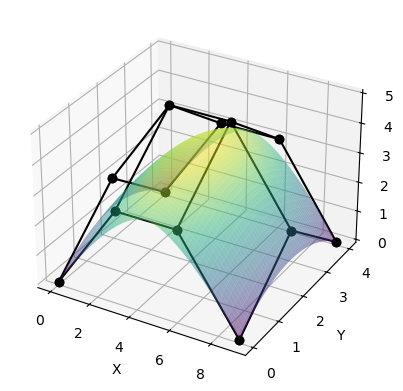

In [144]:
# len(U)-p-1 = 4,len(V)-q-1 = 3,d =3
U = [0,0,0,0.5,1,1,1]
V = [0,0,0,1,1,1]
p = q = 2
alpha = zeros((4,3,3))
alpha[0,0,:] = [0,0,0]
alpha[0,1,:] = [0,2,2]
alpha[0,2,:] = [0,4,0]

alpha[1,0,:] =[3,0,3]
alpha[1,1,:] =[3,2,5]
alpha[1,2,:] =[3,4,3]

alpha[2,0,:] = [6,0,3]
alpha[2,1,:] = [6,2,5]
alpha[2,2,:] = [6,4,3]

alpha[3,0,:] = [9,0,0]
alpha[3,1,:] = [9,2,2]
alpha[3,2,:] = [9,4,0]

S = plot_surface_2D(U, V, alpha, q, p, nx = 100, ny = 100)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# xs = linspace(0,1,100)
# ys = linspace(0,1,100)
# X, Y = np.meshgrid(xs, ys)
X = S[:,:,0]#mpping
Y = S[:,:,1]
Z = S[:,:,2]
# ax.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
# ax.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
for i in range(alpha.shape[0]):
    print(alpha[i,:,0], alpha[i,:,1], alpha[i,:,2])
    ax.plot(alpha[i,:,0], alpha[i,:,1], alpha[i,:,2], '-ok')  # Tracer les lignes dans un sens
for i in range(alpha.shape[1]):
    ax.plot(alpha[:,i,0], alpha[:,i,1], alpha[:,i,2], '-ok')  # Tracer les lignes dans l'autre sens

# ax.plot(alpha[:,:,0], alpha[:,:,1], alpha[:,:,2], '-ok')
# ax.plot(alpha[:,:,0].T, alpha[:,:,1].T, alpha[:,:,2].T, '-ok')
# # ax.scatter(alpha[:,:,0],alpha[:,:,1],alpha[:,:,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

[0. 0. 0.] [0. 2. 4.] [0. 2. 0.]
[3. 3. 3.] [0. 2. 4.] [3. 5. 3.]
[6. 6. 6.] [0. 2. 4.] [3. 5. 3.]
[9. 9. 9.] [0. 2. 4.] [0. 2. 0.]


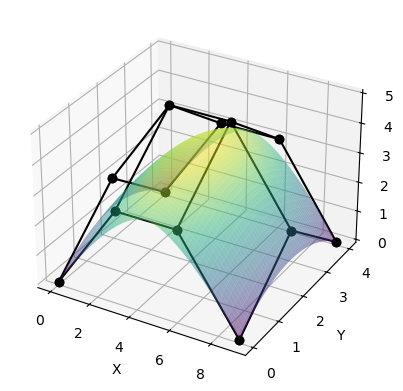

In [145]:
# len(U)-p-1 = 4,len(V)-q-1 = 3,d =3
U = [0,0,0,0.5,1,1,1]
V = [0,0,0,1,1,1]
p = q = 2
alpha = zeros((4,3,3))
alpha[0,0,:] = [0,0,0]
alpha[0,1,:] = [0,2,2]
alpha[0,2,:] = [0,4,0]

alpha[1,0,:] =[3,0,3]
alpha[1,1,:] =[3,2,5]
alpha[1,2,:] =[3,4,3]

alpha[2,0,:] = [6,0,3]
alpha[2,1,:] = [6,2,5]
alpha[2,2,:] = [6,4,3]

alpha[3,0,:] = [9,0,0]
alpha[3,1,:] = [9,2,2]
alpha[3,2,:] = [9,4,0]

S = plot_surface_2D(U, V, alpha, q, p, nx = 100, ny = 100)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# xs = linspace(0,1,100)
# ys = linspace(0,1,100)
# X, Y = np.meshgrid(xs, ys)
X = S[:,:,0]#mpping
Y = S[:,:,1]
Z = S[:,:,2]
# ax.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
# ax.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
for i in range(alpha.shape[0]):
    print(alpha[i,:,0], alpha[i,:,1], alpha[i,:,2])
    ax.plot(alpha[i,:,0], alpha[i,:,1], alpha[i,:,2], '-ok')  # Tracer les lignes dans un sens
for i in range(alpha.shape[1]):
    ax.plot(alpha[:,i,0], alpha[:,i,1], alpha[:,i,2], '-ok')  # Tracer les lignes dans l'autre sens

# ax.plot(alpha[:,:,0], alpha[:,:,1], alpha[:,:,2], '-ok')
# ax.plot(alpha[:,:,0].T, alpha[:,:,1].T, alpha[:,:,2].T, '-ok')
# # ax.scatter(alpha[:,:,0],alpha[:,:,1],alpha[:,:,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [146]:
def plot_R_surface_2D(knots_1, knots_2, alpha, degree_1, degree_2,w1,w2, nx = 100, ny = 100):
    xs = linspace(knots_1[degree_1],knots_1[-degree_1-1], nx)
    ys = linspace(knots_2[degree_2],knots_2[-degree_2-1], ny)
    n,m, d = alpha.shape
    P = zeros((n,m,d,1))
    Q = zeros((nx,ny,d,1))
    P[:,:,:,0] = alpha.copy()
    saved = zeros(d)
    for i ,xi in enumerate(xs):
        for j,yj in enumerate(ys):
            ispan = find_span(knots_1,xi,degree_1)     
            jspan = find_span(knots_2,yj,degree_2)
            values_xi = basis_funct(xi,degree_1,knots_1,ispan)
            values_yj = basis_funct(yj,degree_2,knots_2,jspan)  
            saved[:]  = 0.0
            ratio = 0.0
            for ik in range(degree_1 + 1):
                for jk in range(degree_2 + 1):
                    R  = values_xi[ik] * w1[ispan-degree_1+ik] 
                    R *= values_yj[jk] * w2[jspan-degree_2+jk]
                    ratio += R
                    saved[:]   += R*P[ispan-degree_1+ik,jspan-degree_2+jk,:,0]
                     # saved[:]   += values_xi[ik]*values_yj[jk]*P[ispan-degree_1+ik,jspan-degree_2+jk,:,0]

            
            Q[i,j,:,0] = saved[:]/ratio
    return  Q[:,:,:,0]


[ 1.  1. -1.] [0. 1. 1.] [0. 0. 0.]
[ 1.  1. -1.] [0. 1. 1.] [1. 1. 1.]
[ 1.  1. -1.] [0. 1. 1.] [2. 2. 2.]


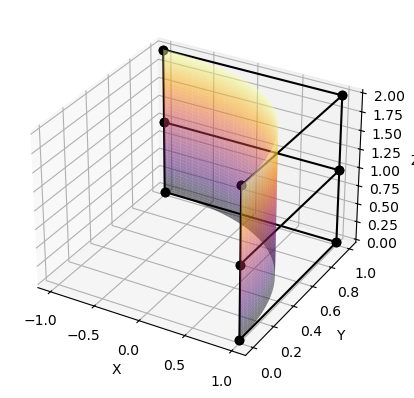

In [148]:
# len(U)-p-1 = 4,len(V)-q-1 = 3,d =3
U = [0,0,0,1,1,1]
V = [0,0,0,1,1,1]
p = q = 2
w1      = [1., 1/np.sqrt(2),  1.]  
w2      = [1.,           1.,  1.]  

if False :
    P = np.zeros((n, 2))
    P[:, 0] = [1., 1., 0., -1., -1., -1.,  0.,  1., 1.]
    P[:, 1] = [0., 1., 1.,  1.,  0., -1., -1., -1., 0.]   
    #...
    w      = [1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1.]

alpha = zeros((3,3,3))
alpha[0,0,:] = [1,0,0]
alpha[0,1,:] = [1,1,0]
alpha[0,2,:] = [-1,1,0]

alpha[1,:,:] = alpha[0,:,:]
alpha[1,:,-1]+= 1.

alpha[2,:,:] = alpha[0,:,:]
alpha[2,:,-1]+= 2.

S = plot_R_surface_2D(U, V, alpha, p, q, w1, w2, nx = 100, ny = 100)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# xs = linspace(0,1,100)
# ys = linspace(0,1,100)
# X, Y = np.meshgrid(xs, ys)
X = S[:,:,0]#mpping
Y = S[:,:,1]
Z = S[:,:,2]
# ax.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
# ax.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
ax.plot_surface(X, Y, Z, cmap='inferno', alpha=0.5)
for i in range(alpha.shape[0]):
    print(alpha[i,:,0], alpha[i,:,1], alpha[i,:,2])
    ax.plot(alpha[i,:,0], alpha[i,:,1], alpha[i,:,2], '-ok')  # Tracer les lignes dans un sens
for i in range(alpha.shape[1]):
    ax.plot(alpha[:,i,0], alpha[:,i,1], alpha[:,i,2], '-ok')  # Tracer les lignes dans l'autre sens

# ax.plot(alpha[:,:,0], alpha[:,:,1], alpha[:,:,2], '-ok')
# ax.plot(alpha[:,:,0].T, alpha[:,:,1].T, alpha[:,:,2].T, '-ok')
# # ax.scatter(alpha[:,:,0],alpha[:,:,1],alpha[:,:,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.savefig("QuartCylindre.png")
plt.show()


In [149]:

print(type(alpha[0, 1, :]))
print(alpha[0, 1, :])

<class 'numpy.ndarray'>
[1. 1. 0.]


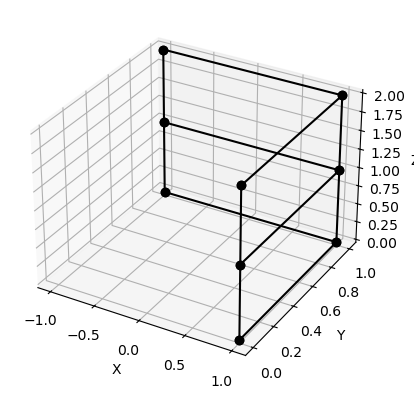

In [150]:
U = [0, 0, 0, 1, 1, 1]
V = [0, 0, 0, 1, 1, 1]
p = q = 2
w1 = [1., 1/np.sqrt(2), 1.]
w2 = [1., 1., 1.]

alpha = np.zeros((3, 3, 3))
alpha[0, 0, :] = [1, 0, 0]
alpha[0, 1, :] = [1, 1, 0]
alpha[0, 2, :] = [-1, 1, 0]

alpha[1, :, :] = alpha[0, :, :]
alpha[1, :, -1] += 1.

alpha[2, :, :] = alpha[0, :, :]
alpha[2, :, -1] += 2.

# Generate the plot data for the surface
S = plot_R_surface_2D(U, V, alpha, p, q, w1, w2, nx=100, ny=100)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the control points and their connections
for i in range(alpha.shape[0]):
    ax.plot(alpha[i, :, 0], alpha[i, :, 1], alpha[i, :, 2], '-ok')  # Tracer les lignes dans un sens
for i in range(alpha.shape[1]):
    ax.plot(alpha[:, i, 0], alpha[:, i, 1], alpha[:, i, 2], '-ok')  # Tracer les lignes dans l'autre sens

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.savefig("Control_Polygon11.png")
plt.show()

In [151]:
print( alpha[0, :, 1])

[0. 1. 1.]


[ 1.  1.  0. -1. -1. -1.  0.  1.  1.] [ 0.  1.  1.  1.  0. -1. -1. -1.  0.] [0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 1.  1.  0. -1. -1. -1.  0.  1.  1.] [ 0.  1.  1.  1.  0. -1. -1. -1.  0.] [1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 1.  1.  0. -1. -1. -1.  0.  1.  1.] [ 0.  1.  1.  1.  0. -1. -1. -1.  0.] [2. 2. 2. 2. 2. 2. 2. 2. 2.]


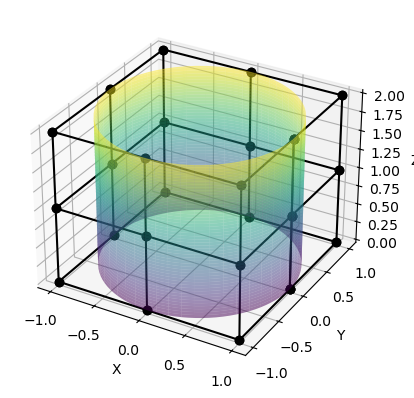

In [152]:
# len(U)-p-1 = 4,len(V)-q-1 = 3,d =3
if True :
    #...
    V = [0., 0., 0., 1/3, 1/3, 0.5, 0.5, 0.75, 0.75, 1., 1., 1.]
    U = [0,0,0,1,1,1]
    p  = q       = 2
    w2           = [1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1.]
    w1           = [1.,           1.,  1.]  
    alpha = zeros((3,9,3))
    alpha[0,0,:] = [1,0,0]
    alpha[0,1,:] = [1,1,0]
    alpha[0,2,:] = [0,1,0]
    alpha[0,3,:] = [-1,1,0]
    alpha[0,4,:] = [-1,0,0]
    alpha[0,5,:] = [-1,-1,0]
    alpha[0,6,:] = [0,-1,0]
    alpha[0,7,:] = [1,-1,0]
    alpha[0,8,:] = [1,0,0]
    
    alpha[1,:,:] = alpha[0,:,:]
    alpha[1,:,-1]+= 1.
    
    alpha[2,:,:] = alpha[0,:,:]
    alpha[2,:,-1]+= 2.
    
    S = plot_R_surface_2D(U, V, alpha, p, q, w1, w2, nx = 100, ny = 100)    
# if False :
#     U = [0,0,0,1,1,1]
#     V = [0,0,0,1,1,1]
#     p = q = 2
#     w1      = [1., 1/np.sqrt(2),  1.]  
#     w2      = [1.,           1.,  1.]  
#     alpha = zeros((3,3,3))
#     alpha[0,0,:] = [1,0,0]
#     alpha[0,1,:] = [1,1,0]
#     alpha[0,2,:] = [-1,1,0]
    
#     alpha[1,:,:] = alpha[0,:,:]
#     alpha[1,:,-1]+= 1.
    
#     alpha[2,:,:] = alpha[0,:,:]
#     alpha[2,:,-1]+= 2.
    
#     S = plot_R_surface_2D(U, V, alpha, p, q, w1, w2, nx = 100, ny = 100)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# xs = linspace(0,1,100)
# ys = linspace(0,1,100)
# X, Y = np.meshgrid(xs, ys)
X = S[:,:,0]#mpping
Y = S[:,:,1]
Z = S[:,:,2]
# ax.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
# ax.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
for i in range(alpha.shape[0]):
    print(alpha[i,:,0], alpha[i,:,1], alpha[i,:,2])
    ax.plot(alpha[i,:,0], alpha[i,:,1], alpha[i,:,2], '-ok')  # Tracer les lignes dans un sens
for i in range(alpha.shape[1]):
    ax.plot(alpha[:,i,0], alpha[:,i,1], alpha[:,i,2], '-ok')  # Tracer les lignes dans l'autre sens

# ax.plot(alpha[:,:,0], alpha[:,:,1], alpha[:,:,2], '-ok')
# ax.plot(alpha[:,:,0].T, alpha[:,:,1].T, alpha[:,:,2].T, '-ok')
# # ax.scatter(alpha[:,:,0],alpha[:,:,1],alpha[:,:,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.savefig("Cylindre.png")
plt.show()

[ 1.  1.  0. -1. -1. -1.  0.  1.  1.] [ 0.  1.  1.  1.  0. -1. -1. -1.  0.] [0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 1.  1.  0. -1. -1. -1.  0.  1.  1.] [ 0.  1.  1.  1.  0. -1. -1. -1.  0.] [1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 1.  1.  0. -1. -1. -1.  0.  1.  1.] [ 0.  1.  1.  1.  0. -1. -1. -1.  0.] [2. 2. 2. 2. 2. 2. 2. 2. 2.]


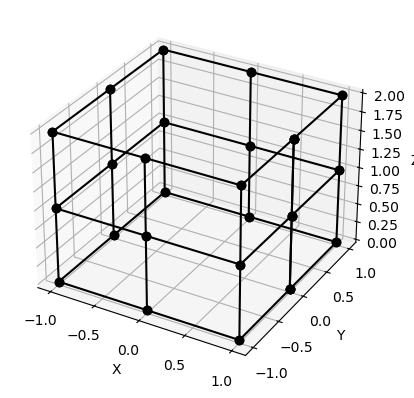

In [153]:
# len(U)-p-1 = 4,len(V)-q-1 = 3,d =3
if True :
    #...
    V = [0., 0., 0., 1/3, 1/3, 0.5, 0.5, 0.75, 0.75, 1., 1., 1.]
    U = [0,0,0,1,1,1]
    p  = q       = 2
    w2           = [1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1.]
    w1           = [1.,           1.,  1.]  
    alpha = zeros((3,9,3))
    alpha[0,0,:] = [1,0,0]
    alpha[0,1,:] = [1,1,0]
    alpha[0,2,:] = [0,1,0]
    alpha[0,3,:] = [-1,1,0]
    alpha[0,4,:] = [-1,0,0]
    alpha[0,5,:] = [-1,-1,0]
    alpha[0,6,:] = [0,-1,0]
    alpha[0,7,:] = [1,-1,0]
    alpha[0,8,:] = [1,0,0]
    
    alpha[1,:,:] = alpha[0,:,:]
    alpha[1,:,-1]+= 1.
    
    alpha[2,:,:] = alpha[0,:,:]
    alpha[2,:,-1]+= 2.
    
    S = plot_R_surface_2D(U, V, alpha, p, q, w1, w2, nx = 100, ny = 100)    
if False :
    U = [0,0,0,1,1,1]
    V = [0,0,0,1,1,1]
    p = q = 2
    w1      = [1., 1/np.sqrt(2),  1.]  
    w2      = [1.,           1.,  1.]  
    alpha = zeros((3,3,3))
    alpha[0,0,:] = [1,0,0]
    alpha[0,1,:] = [1,1,0]
    alpha[0,2,:] = [-1,1,0]
    
    alpha[1,:,:] = alpha[0,:,:]
    alpha[1,:,-1]+= 1.
    
    alpha[2,:,:] = alpha[0,:,:]
    alpha[2,:,-1]+= 2.
    
    S = plot_R_surface_2D(U, V, alpha, p, q, w1, w2, nx = 100, ny = 100)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# xs = linspace(0,1,100)
# ys = linspace(0,1,100)
# X, Y = np.meshgrid(xs, ys)
X = S[:,:,0]#mpping
Y = S[:,:,1]
Z = S[:,:,2]
# ax.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
# ax.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
# ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
for i in range(alpha.shape[0]):
    print(alpha[i,:,0], alpha[i,:,1], alpha[i,:,2])
    ax.plot(alpha[i,:,0], alpha[i,:,1], alpha[i,:,2], '-ok')  # Tracer les lignes dans un sens
for i in range(alpha.shape[1]):
    ax.plot(alpha[:,i,0], alpha[:,i,1], alpha[:,i,2], '-ok')  # Tracer les lignes dans l'autre sens

# ax.plot(alpha[:,:,0], alpha[:,:,1], alpha[:,:,2], '-ok')
# ax.plot(alpha[:,:,0].T, alpha[:,:,1].T, alpha[:,:,2].T, '-ok')
# # ax.scatter(alpha[:,:,0],alpha[:,:,1],alpha[:,:,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.savefig("Cylindre11.png")
plt.show()

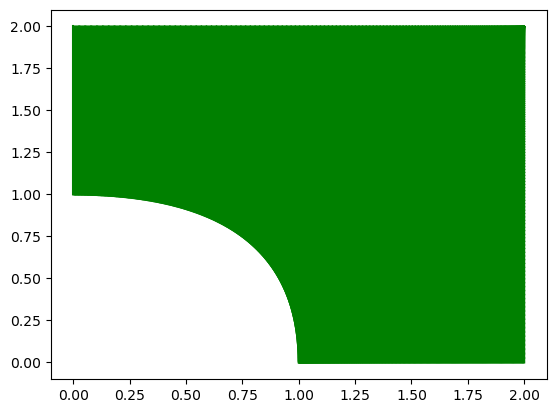

In [154]:
#Giving d=2
alpha = zeros((4,3,2))
alpha[0,0,:] = [1,0]
alpha[0,1,:] = [1.25,0]
alpha[0,2,:] =[2,0]

alpha[1,0,:] =[1,0.5]
alpha[1,1,:] =[1.5,0.75]
alpha[1,2,:] =[2,2]

alpha[2,0,:] = [0.5,1]
alpha[2,1,:] = [0.75,1.5]
alpha[2,2,:] = [2,2]

alpha[3,0,:] = [0,1]
alpha[3,1,:] = [0,1.5]
alpha[3,2,:] = [0,2]
alpha = alpha[:,:,:2]
U = [0,0,0,0.5,1,1,1]
V = [0,0,0,1,1,1]
p = q = 2
S = plot_surface_2D(U, V, alpha, q, p, nx = 300, ny = 300)
xs = linspace(0,1,100)
ys = linspace(0,1,100)
fig = plt.figure()

X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
# Z = S[:,:,2]
for i in range(X.shape[0]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')
#for i in range(alpha.shape[1]):
#    plt.plot(alpha[:,i,0],alpha[:,i,1], '-ok')
#for i in range(alpha.shape[0]):
#    plt.plot(alpha[i,:,0],alpha[i,:,1], '-ok')
# plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
# plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
# ax.plot_surface(X, X, Z, cmap='viridis', alpha=0.5)
# ax.scatter(alpha[:,:,0],alpha[:,:,1],alpha[:,:,2])
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
plt.savefig("QuartofDunus.png")
plt.show()

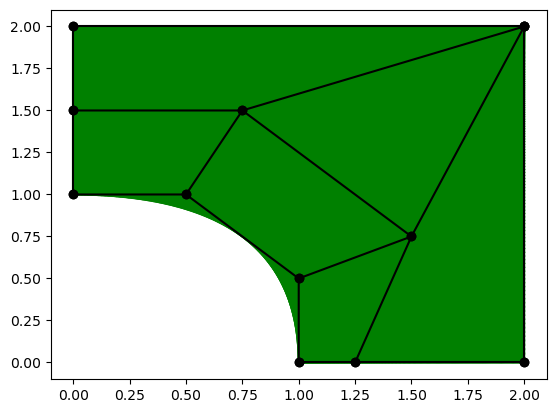

In [155]:
S = plot_surface_2D(U, V, alpha, q, p, nx = 300, ny = 300)
xs = linspace(0,1,100)
ys = linspace(0,1,100)
fig = plt.figure()

X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
# Z = S[:,:,2]
for i in range(X.shape[0]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')
#for i in range(alpha.shape[1]):
#    plt.plot(alpha[:,i,0],alpha[:,i,1], '-ok')
#for i in range(alpha.shape[0]):
#    plt.plot(alpha[i,:,0],alpha[i,:,1], '-ok')
plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
# ax.plot_surface(X, X, Z, cmap='viridis', alpha=0.5)
# ax.scatter(alpha[:,:,0],alpha[:,:,1],alpha[:,:,2])
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
plt.savefig("QuartofDunuspoly.png")
plt.show()

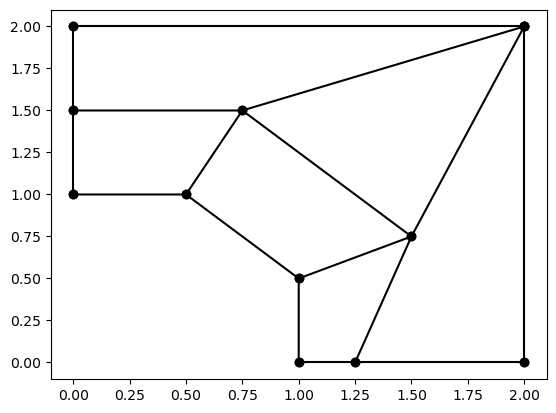

In [44]:
plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
# ax.plot_surface(X, X, Z, cmap='viridis', alpha=0.5)
# ax.scatter(alpha[:,:,0],alpha[:,:,1],alpha[:,:,2])
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
plt.savefig("Quartpoly.png")
plt.show()

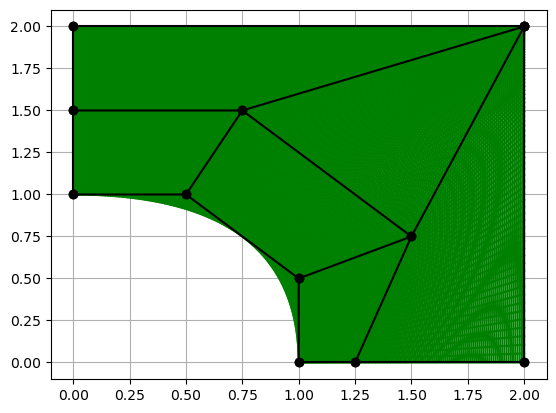

In [45]:
alpha = zeros((4,3,3))
alpha[0,0,:] = [1,0, 0]
alpha[0,1,:] = [1.25,0,0]
alpha[0,2,:] =[2,0,0]

alpha[1,0,:] =[1,0.5,0]
alpha[1,1,:] =[1.5,0.75,0]
alpha[1,2,:] =[2,2,0]

alpha[2,0,:] = [0.5,1,0]
alpha[2,1,:] = [0.75,1.5,0]
alpha[2,2,:] = [2,2,0]

alpha[3,0,:] = [0,1,0]
alpha[3,1,:] = [0,1.5,0]
alpha[3,2,:] = [0,2,0]
alpha = alpha[:,:,:2]
U = [0,0,0,0.5,1,1,1]
V = [0,0,0,1,1,1]
p = q = 2
S = plot_surface_2D(U, V, alpha, q, p, nx = 150, ny = 150)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[0]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')
for i in range(alpha.shape[1]):
   plt.plot(alpha[:,i,0],alpha[:,i,1], '-ok')
for i in range(alpha.shape[0]):
   plt.plot(alpha[i,:,0],alpha[i,:,1], '-ok')
# en trace suivant les ligne et puis suivent les c
# plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
# plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
plt.grid()
plt.show()



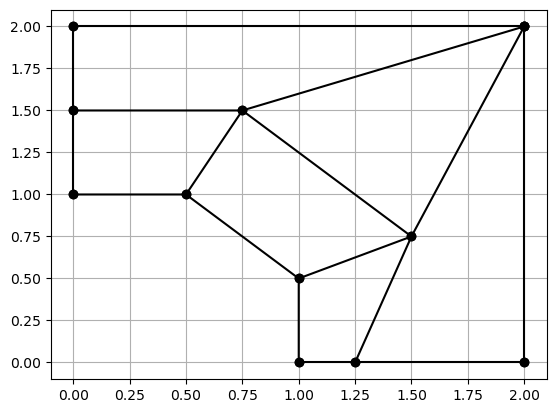

In [46]:
for i in range(alpha.shape[1]):
   plt.plot(alpha[:,i,0],alpha[:,i,1], '-ok')
for i in range(alpha.shape[0]):
   plt.plot(alpha[i,:,0],alpha[i,:,1], '-ok')
# en trace suivant les ligne et puis suivent les c
# plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
# plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
plt.grid()
plt.show()



#Inseration d'un neuods 


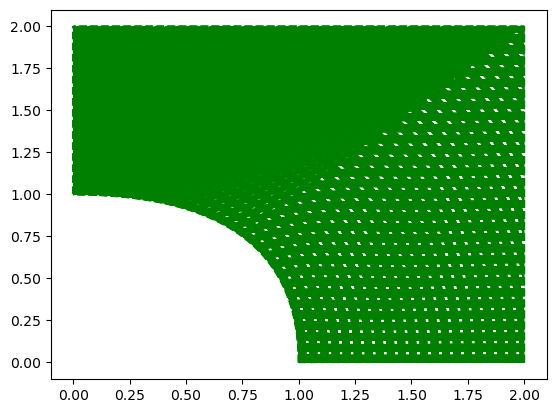

In [50]:
import numpy as np
alpha = zeros((5,3,3))
alpha[0,0,:] = [1,0, 0]
alpha[0,1,:] = [1.25,0,0]
alpha[0,2,:] =[2,0,0]

alpha[1,0,:] =[1,0.5,0]
alpha[1,1,:] =[1.5,0.75,0]
alpha[1,2,:] =[2,1,0]

alpha[2,0,:] = [0.75,0.75,0]
alpha[2,1,:] = [1.5,1.5,0]
alpha[2,2,:] = [2,2,0]

alpha[3,0,:] = [0.5,1,0]
alpha[3,1,:] = [0.75,1.5,0]
alpha[3,2,:] = [1,2,0]

alpha[4,0,:] = [0,1,0]
alpha[4,1,:] = [0,1.5,0]
alpha[4,2,:] = [0,2,0]



alpha = alpha[:,:,:2]
#inseration d'un point max p+1
U = [0,0,0,0.5,0.5,1,1,1]# 2 neuods  
V = [0,0,0,1,1,1]
p = q = 2

S = plot_surface_2D(U, V, alpha, q, p, nx = 1000, ny = 1000)
fig = plt.figure()
xs = np.linspace(0, 1, 100)
ys = np.linspace(0, 1, 100)

X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[0]):
    plt.plot(X[:,i],Y[:,i],'g--')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g--')
# for i in range(alpha.shape[1]):
#    plt.plot(alpha[:,i,0],alpha[:,i,1], '-ok')
# for i in range(alpha.shape[0]):
#    plt.plot(alpha[i,:,0],alpha[i,:,1], '-ok')
#en trace suivant les ligne et puis suivent les c
# plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
# plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
# plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
# plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
# rien changer dans le polygone §§§§§§§!!!!!!

plt.savefig("INserationquartdunnas.png")
plt.show()



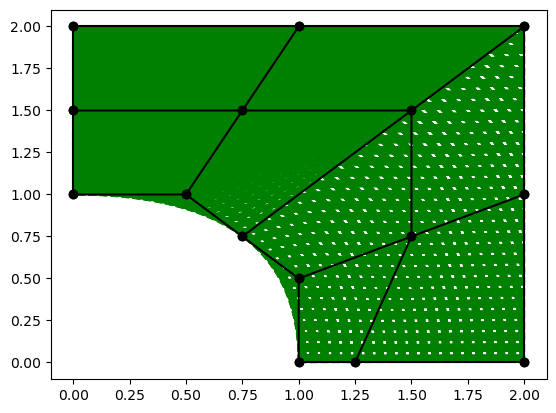

In [49]:
S = plot_surface_2D(U, V, alpha, q, p, nx = 1000, ny = 1000)
fig = plt.figure()
xs = np.linspace(0, 1, 100)
ys = np.linspace(0, 1, 100)

X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[0]):
    plt.plot(X[:,i],Y[:,i],'g--')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g--')
# for i in range(alpha.shape[1]):
#    plt.plot(alpha[:,i,0],alpha[:,i,1], '-ok')
# for i in range(alpha.shape[0]):
#    plt.plot(alpha[i,:,0],alpha[i,:,1], '-ok')
#en trace suivant les ligne et puis suivent les c
# plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
# plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
# rien changer dans le polygone §§§§§§§!!!!!!
# plt.grid()
# plt.show()
plt.savefig("INserationquartdunnaswithpoly.png")
plt.show()


In [ ]:
plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
# rien changer dans le polygone §§§§§§§!!!!!!
plt.savefig("INserapoly.png")
plt.show()


## EX 2

In [ ]:
alpha = zeros((5,3,2))
# i =  len(knots&)-2-1  ; j = len(knots2)-2-1 ; d = 2 
alpha[0,0,:] = [1,0]
alpha[0,1,:] =[2,0] 
alpha[0,2,:] =[4,0]

alpha[1,0,:] =[1,1]
alpha[1,1,:] =[1,2]

alpha[1,2,:] =[4,4]

alpha[2,0,:] =[0.,1.]
alpha[2,1,:] = [0,2]
alpha[2,2,:] =  [0,4]

alpha[3,0,:] = [-1,1] 
alpha[3,1,:] = [-2,2]
alpha[3,2,:] = [-4,4]
alpha[4,0,:] = [-1,0]
alpha[4,1,:] =[-2,0]
alpha[4,2,:] = [-4,0]

degree_1 = 2
degree_2 = 2

alpha = alpha[:,:,:2]
knots_1 = [0., 0., 0., 1/2,2/3,1, 1., 1.]
knots_2 = [0., 0., 0., 1., 1., 1.]
S = plot_surface_2D(knots_1, knots_2, alpha, degree_1, degree_2, 200, 200)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[0]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')
# for i in range(alpha.shape[1]):
#    plt.plot(alpha[:,i,0],alpha[:,i,1], '-ok')
# for i in range(alpha.shape[0]):
#    plt.plot(alpha[i,:,0],alpha[i,:,1], '-ok')
#en trace suivant les ligne et puis suivent les c
# plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
# plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
plt.grid()
plt.savefig("thehullLSHAPE.png")
plt.show()


In [ ]:
S = plot_surface_2D(knots_1, knots_2, alpha, degree_1, degree_2, 200, 200)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[0]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')
# for i in range(alpha.shape[1]):
#    plt.plot(alpha[:,i,0],alpha[:,i,1], '-ok')
# for i in range(alpha.shape[0]):
#    plt.plot(alpha[i,:,0],alpha[i,:,1], '-ok')
#en trace suivant les ligne et puis suivent les c
plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
plt.grid()
plt.savefig("thehullLSHAPEwithpoly.png")
plt.show()


In [ ]:

# for i in range(alpha.shape[1]):
#    plt.plot(alpha[:,i,0],alpha[:,i,1], '-ok')
# for i in range(alpha.shape[0]):
#    plt.plot(alpha[i,:,0],alpha[i,:,1], '-ok')
#en trace suivant les ligne et puis suivent les c
plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
plt.grid()
plt.show()


## Surface_Point

In [ ]:
def Suface_Point( U, V, t, v, p, q, P ):
    tspan = find_span( U, t, p )
    vspan = find_span( V, v, q )
    Nt    = basis_funct( t, p, U, tspan )
    Nv     = basis_funct( v, q, V, vspan )    
    S        =       0.0
    for l in range(q + 1):
        vind = vspan -q + l
        for k in range( p + 1 ):
            tind = tspan - p + k
            S +=  Nv[l]*Nt[k]*P[tind,vind]
    return S


## Rational B-Spline Curve

In [41]:
plt.figure(figsize=(6,4))
def plot_Rational_Bspline(knots, degree, nx, w):
    t = np.linspace(knots[degree], knots[-degree-1], nx)
    nspline = len(knots)-degree-1
    P = zeros((nx,nspline))
    # P = np.zeros((len(alpha), 1))
    # P[:, 0] = alpha[:]
    # Q = zeros((nx, 1))
    for i, xi in enumerate(t):
        ispan = find_span(knots, xi, degree)
        values_xi = basis_funct(xi, degree, knots, ispan)
        ratio = 0.0
        for k in range(0, degree+1):  
            values_xi[k] = values_xi[k] * w[ispan-degree+k] 
            ratio += values_xi[k]
        R = values_xi / ratio
        P[i, isapn-degree : ispan+1] = R    
    for j in range(nspline):
        plt.plot(t,P[:,j],label=r'$N_{}^{}$'.format(j,degree))
        plt.legend(loc='best')
    plt.grid()
    plt.show()
    

<Figure size 600x400 with 0 Axes>

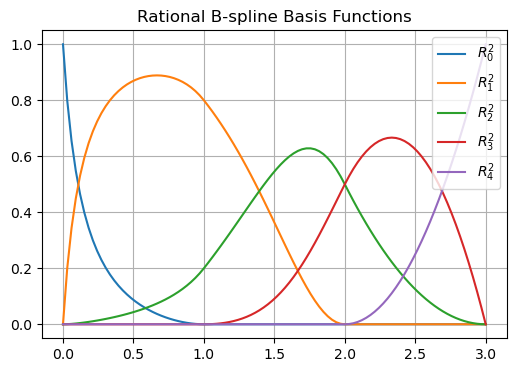

In [42]:
plt.figure(figsize=(6,4))
def plot_Rational_Bspline(knots, degree, nx, w):
    t = np.linspace(knots[degree], knots[-degree-1], nx)
    nspline = len(knots) - degree - 1
    P = np.zeros((nx, nspline))

    for i, xi in enumerate(t):
        ispan = find_span(knots, xi, degree)
        values_xi = basis_funct(xi, degree, knots, ispan)
        ratio = 0.0
        for k in range(0, degree+1):
            values_xi[k] = values_xi[k] * w[ispan-degree+k]
            ratio += values_xi[k]
        R = values_xi / ratio
        P[i, ispan-degree:ispan+1] = R
    for j in range(nspline):
        plt.plot(t, P[:,j], label=r'$R_{}^{}$'.format(j, degree))
    plt.legend(loc='best')
    plt.savefig("Rationnal_B-Spline_basis_fct.png")
    plt.grid()
    # plt.xlabel('t')
    # plt.ylabel('Rational B-spline basis function value')
    plt.title('Rational B-spline Basis Functions')
    plt.show()

# Example usage
knots = [0, 0, 0, 1, 2, 3, 3, 3]  # Example knots
degree = 2  # Example degree
nx = 100  # Number of points for plotting
w = [1, 4, 1, 1, 1] # Example weights

plot_Rational_Bspline(knots, degree, nx, w)


In [85]:
def Point_on_Rational_Bspline_curve(knots, degree, alpha,  nx, w):
    t = np.linspace(knots[degree], knots[-degree-1], nx)
    P = np.zeros((len(alpha), 1))
    P[:, 0] = alpha[:]
    Q = zeros((nx, 1))
    for i, xi in enumerate(t):
        C = zeros(P.shape[-1])
        ispan = find_span(knots, xi, degree)
        values_xi = basis_funct(xi, degree, knots, ispan)
        ratio = 0.
        for k in range(0, degree+1):  
            values_xi[k] = values_xi[k] * w[ispan-degree+k] 
            ratio += values_xi[k]
        R = values_xi / ratio
        for jk in range(degree+1):
            C[:] += R[jk] * P[ispan-degree+jk, :]
        Q[i, :] = C[:]
    return Q[:, 0]


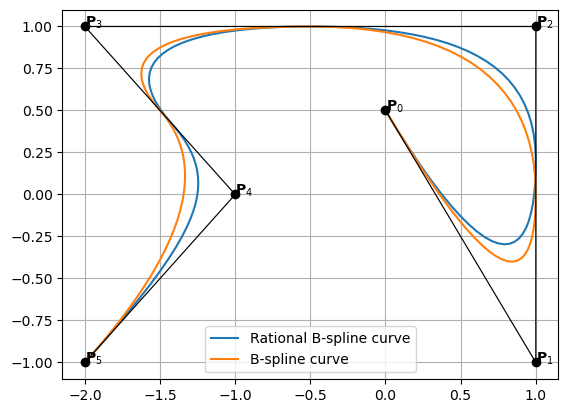

In [86]:
knots = [0., 0., 0., 0.25, 0.5, 0.75, 1., 1., 1.]
degree = 2
nx = 100
alpha_x = [0., 1., 1., -2., -1., -2.]
alpha_y = [0.5, -1., 1., 1., 0., -1.]
w       = array([1., 1., 1.5, 1.5, 2., 1.])
w1      = ones(len(array([1/2., 1/2., 1.5, 1/2., 1., 1.])))

n = len(knots) - degree - 1
PxR = Point_on_Rational_Bspline_curve(knots, degree, alpha_x,  nx, w)
PyR = Point_on_Rational_Bspline_curve(knots, degree, alpha_y, nx, w)

Px = Point_on_Rational_Bspline_curve(knots, degree, alpha_x,  nx, w1)
Py = Point_on_Rational_Bspline_curve(knots, degree, alpha_y, nx, w1)

plt.plot(PxR,PyR, lw=1.5, label='Rational B-spline curve')
plt.plot(Px,Py, lw=1.5, label='B-spline curve')
plt.plot(alpha_x, alpha_y, '-ok', lw=0.85)
for j in range(len(alpha_x)):
    x = alpha_x[j]
    y = alpha_y[j]
    plt.text(x + 0.0005, y + 0.0005, f'$\mathbf{{P}}_{{{j}}}$')
plt.legend()
plt.savefig("Rational_Bspline_curve_Circle111.png")
plt.grid()
plt.show()


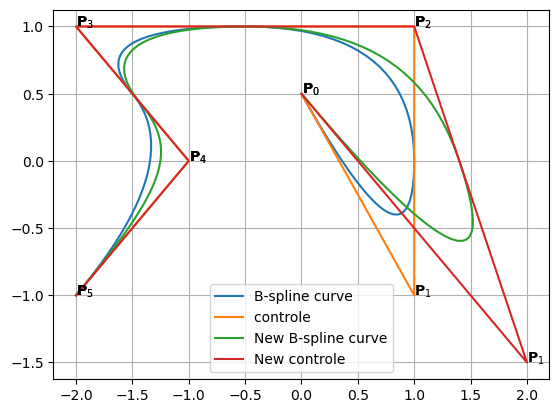

In [87]:
knots = [0., 0., 0., 0.25, 0.5, 0.75, 1., 1., 1.]
degree = 2
nx = 100
alpha_x  = [0., 1., 1., -2., -1., -2.]
alpha_y  = [0.5, -1., 1., 1., 0., -1.]
alpha_x1 = [0,    2, 1., -2., -1., -2.]
alpha_y2 = [0.5, -1.5, 1., 1., 0., -1.]

w1       = ones(len(array([1/2., 1/2., 1.5, 1/2., 1., 1.])))
w       = array([1., 1., 1.5, 1.5, 2., 1.])
n = len(knots) - degree - 1
Pxnew = Point_on_Rational_Bspline_curve(knots, degree, alpha_x1,  nx, w)
Pynew = Point_on_Rational_Bspline_curve(knots, degree, alpha_y2, nx, w)

Px = Point_on_Rational_Bspline_curve(knots, degree, alpha_x,  nx, w1)
Py = Point_on_Rational_Bspline_curve(knots, degree, alpha_y, nx, w1)


plt.plot(Px,Py, lw=1.5,label='B-spline curve')
plt.plot(alpha_x, alpha_y,  label='controle ')
plt.plot(Pxnew,Pynew, lw=1.5, label='New B-spline curve')
plt.plot(alpha_x1, alpha_y2, label='New controle ')
for j in range(len(alpha_x)):
    x = alpha_x[j]
    y = alpha_y[j]
    plt.text(x + 0.0005, y + 0.0005, f'$\mathbf{{P}}_{{{j}}}$')
for j in range(len(alpha_x)):
    x = alpha_x1[j]
    y = alpha_y2[j]
    plt.text(x + 0.0005, y + 0.0005, f'$\mathbf{{P}}_{{{j}}}$')
plt.legend()
plt.savefig("Rationnal_Bspline_curve1111.png")
plt.grid()
plt.show()

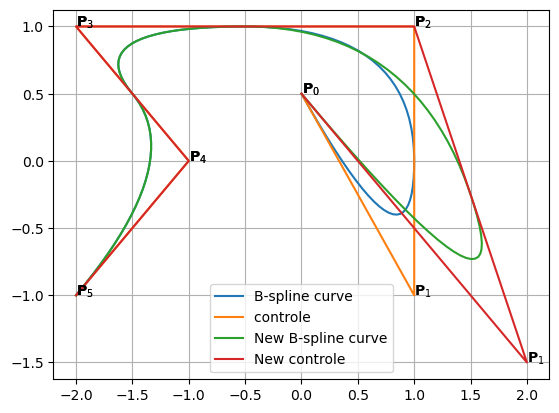

In [88]:
knots = [0., 0., 0., 0.25, 0.5, 0.75, 1., 1., 1.]
degree = 2
nx = 100
alpha_x  = [0., 1., 1., -2., -1., -2.]
alpha_y  = [0.5, -1., 1., 1., 0., -1.]
alpha_x1 = [0, 2, 1., -2., -1., -2.]
alpha_y2 = [0.5, -1.5, 1., 1., 0., -1.]

w1       = ones(len(array([1/2., 1/2., 1.5, 1/2., 1., 1.])))
# w       = array([1., 1., 1.5, 1.5, 2., 1.])
n = len(knots) - degree - 1
Pxnew = Point_on_Rational_Bspline_curve(knots, degree, alpha_x1,  nx, w1)
Pynew = Point_on_Rational_Bspline_curve(knots, degree, alpha_y2, nx, w1)

Px = Point_on_Rational_Bspline_curve(knots, degree, alpha_x,  nx, w1)
Py = Point_on_Rational_Bspline_curve(knots, degree, alpha_y, nx, w1)


plt.plot(Px,Py, lw=1.5,label='B-spline curve')
plt.plot(alpha_x, alpha_y,  label='controle ')
plt.plot(Pxnew,Pynew, lw=1.5, label='New B-spline curve')
plt.plot(alpha_x1, alpha_y2, label='New controle ')
for j in range(len(alpha_x)):
    x = alpha_x[j]
    y = alpha_y[j]
    plt.text(x + 0.0005, y + 0.0005, f'$\mathbf{{P}}_{{{j}}}$')
for j in range(len(alpha_x)):
    x = alpha_x1[j]
    y = alpha_y2[j]
    plt.text(x + 0.0005, y + 0.0005, f'$\mathbf{{P}}_{{{j}}}$')
plt.legend()
plt.savefig("Rationnal_Bspline_curve11112.png")
plt.grid()
plt.show()

# Approaching the cercle 

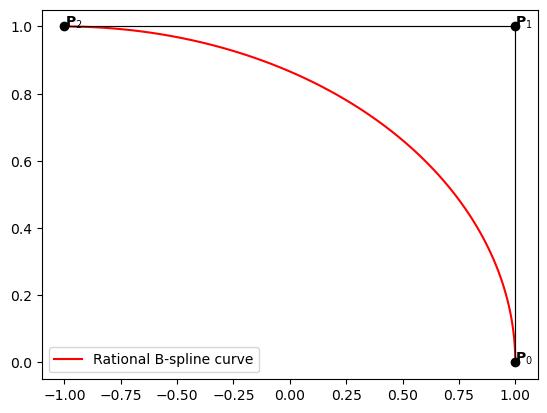

In [89]:
knots = [0., 0., 0.,1., 1., 1.]
degree = 2
nx = 100
alpha_x = [1., 1., -1.]
alpha_y = [0., 1., 1.]  
# w      = [1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1.]  
# alpha_x = [1., 1., 0., -1., -1., -1.,  0.,  1., 1.]
# alpha_y = [0., 1., 1.,  1.,  0., -1., -1., -1., 0.]  
w      = [1., 1/np.sqrt(2),  1.]  
n = len(knots) - degree - 1
PxR = Point_on_Rational_Bspline_curve(knots, degree, alpha_x,  nx, w)
PyR = Point_on_Rational_Bspline_curve(knots, degree, alpha_y, nx, w)
plt.plot(PxR,PyR, lw=1.5, label='Rational B-spline curve',color = 'red')
plt.plot(alpha_x, alpha_y, '-ok', lw=0.85)
# plt.plot(alpha_x, alpha_y, lw=0.85,color='red')

for j in range(len(alpha_x)):
    x = alpha_x[j]
    y = alpha_y[j]
    plt.text(x + 0.0005, y + 0.0005, f'$\mathbf{{P}}_{{{j}}}$')
plt.legend()
plt.show()


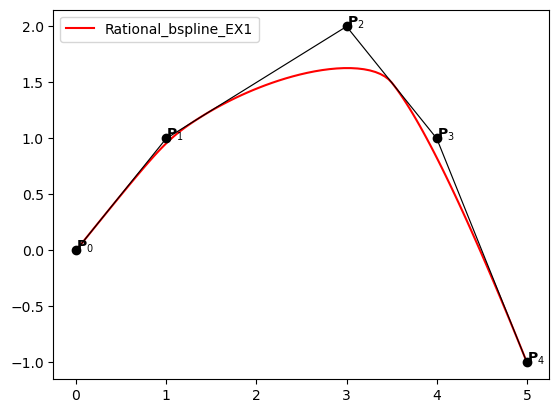

In [90]:
knots = [0, 0, 0, 1, 2, 3, 3, 3]
degree = 2
# nx = 100  (O,O),(1,1),(3,2),(4,1), (5,-1)
alpha_x = [0., 1., 3,4,5]
alpha_y = [0., 1., 2.,1,-1]  
nx=100
# w      = [1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1.]  
# alpha_x = [1., 1., 0., -1., -1., -1.,  0.,  1., 1.]
# alpha_y = [0., 1., 1.,  1.,  0., -1., -1., -1., 0.]  
# w      = [1., 1/np.sqrt(2),  1.,1]  
w =[1, 4, 1, 1, 1]
n = len(knots) - degree - 1
PxR = Point_on_Rational_Bspline_curve(knots, degree, alpha_x,  nx, w)
PyR = Point_on_Rational_Bspline_curve(knots, degree, alpha_y, nx, w)
plt.plot(PxR,PyR, lw=1.5, label='Rational_bspline_EX1',color = 'red')
plt.plot(alpha_x, alpha_y, '-ok', lw=0.85)
# plt.plot(alpha_x, alpha_y, lw=0.85,color='red')

for j in range(len(alpha_x)):
    x = alpha_x[j]
    y = alpha_y[j]
    plt.text(x + 0.0005, y + 0.0005, f'$\mathbf{{P}}_{{{j}}}$')
plt.legend()
plt.show()

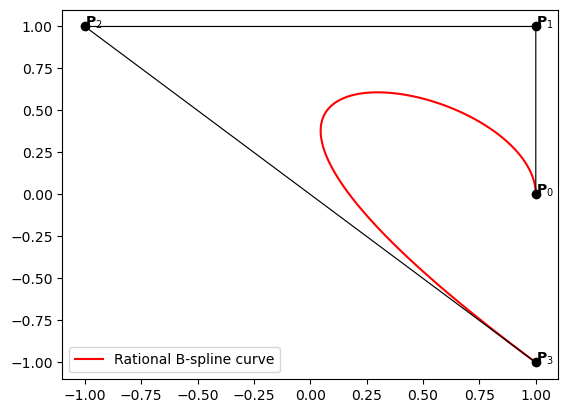

In [91]:
knots = [0., 0., 0.,0,1,1., 1., 1.]
degree = 3
nx = 100
alpha_x = [1., 1., -1,1]
alpha_y = [0., 1., 1.,-1]  
# w      = [1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1.]  
# alpha_x = [1., 1., 0., -1., -1., -1.,  0.,  1., 1.]
# alpha_y = [0., 1., 1.,  1.,  0., -1., -1., -1., 0.]  
w      = [1., 1/np.sqrt(2),  1.,1]  
n = len(knots) - degree - 1
PxR = Point_on_Rational_Bspline_curve(knots, degree, alpha_x,  nx, w)
PyR = Point_on_Rational_Bspline_curve(knots, degree, alpha_y, nx, w)
plt.plot(PxR,PyR, lw=1.5, label='Rational B-spline curve',color = 'red')
plt.plot(alpha_x, alpha_y, '-ok', lw=0.85)
# plt.plot(alpha_x, alpha_y, lw=0.85,color='red')

for j in range(len(alpha_x)):
    x = alpha_x[j]
    y = alpha_y[j]
    plt.text(x + 0.0005, y + 0.0005, f'$\mathbf{{P}}_{{{j}}}$')
plt.legend()
plt.show()

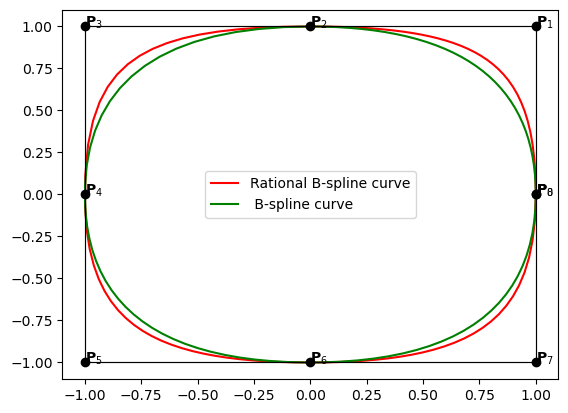

In [92]:
knots = [0., 0., 0., 1/3, 1/3, 0.5, 0.5, 0.75, 0.75, 1., 1., 1.]
degree = 2
nx = 100
alpha_x = [1., 1., 0., -1., -1., -1.,  0.,  1., 1.]
alpha_y = [0., 1., 1.,  1.,  0., -1., -1., -1., 0.]  
w      = [1., 2, 2., 2, 1., 2, 2.5, 2, 1.]  
n = len(knots) - degree - 1
PxR = Point_on_Rational_Bspline_curve(knots, degree, alpha_x,  nx, w)
PyR = Point_on_Rational_Bspline_curve(knots, degree, alpha_y, nx, w)
w1      = ones(len(array([1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1.])))
n = len(knots) - degree - 1
PxRS = Point_on_Rational_Bspline_curve(knots, degree, alpha_x,  nx, w1)
PyRS = Point_on_Rational_Bspline_curve(knots, degree, alpha_y, nx, w1)
plt.plot(PxR,PyR, lw=1.5, label='Rational B-spline curve',color = 'red')
plt.plot(PxRS,PyRS, lw=1.5, label=' B-spline curve',color = 'green')
plt.plot(alpha_x, alpha_y, '-ok', lw=0.85)
# plt.plot(alpha_x, alpha_y, lw=0.85,color='red')

for j in range(len(alpha_x)):
    x = alpha_x[j]
    y = alpha_y[j]
    plt.text(x + 0.0005, y + 0.0005, f'$\mathbf{{P}}_{{{j}}}$')
plt.legend()
plt.show()

## Rationnal B spline surface 

In [100]:
import numpy as np
import matplotlib.pyplot as plt
alpha = np.zeros((3, 3, 3))

alpha[0, 0, :] = [1, 0, 1]
alpha[0, 1, :] = [1, 1, 1 / np.sqrt(2)]
alpha[0, 2, :] = [0, 1, 1]

alpha[1, 0, :] = [-1, 1, 1 / np.sqrt(2)]
alpha[1, 1, :] = [-1, 0, 1]
alpha[1, 2, :] = [-1, -1, 1 / np.sqrt(2)]

alpha[2, 0, :] = [0, -1, 1]
alpha[2, 1, :] = [1, -1, 1 / np.sqrt(2)]
alpha[2, 2, :] = [1, 0, 1]

w1 = [1., 1 / np.sqrt(2), 1., 1 / np.sqrt(2), 1., 1 / np.sqrt(2), 1., 1 / np.sqrt(2), 1.]
w2 = [1., 1 / np.sqrt(2), 1., 1 / np.sqrt(2), 1., 1 / np.sqrt(2), 1., 1 / np.sqrt(2), 1.]

knots_1 = [0., 0., 0., 1 / 3, 1 / 3, 0.5, 0.5, 0.75, 0.75, 1., 1., 1.]
degree_1 = 2
knots_2 = [0., 0., 0., 1 / 3, 1 / 3, 0.5, 0.5, 0.75, 0.75, 1., 1., 1.]
degree_2 = 2
print(linspace(knots_1[degree_1], knots_1[-degree_1-1], 9))
S = plot_R_surface_2D(knots_1, knots_2, alpha, degree_1, degree_2, w1, w2, nx=30, ny=30)
fig = plt.figure()
X, Y = np.meshgrid(linspace(0, 1, S.shape[0]), linspace(0, 1, S.shape[1]))
X = S[:, :, 0]
Y = S[:, :, 1]
for i in range(X.shape[0]):
    plt.plot(X[:, i], Y[:, i])
for i in range(X.shape[0]):
    plt.plot(X.T[:, i], Y.T[:, i])
plt.grid()
plt.show()

# fig = plt.figure()
# Z = X**2
# plt.contourf(X, Y, Z)
# plt.show()


[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


IndexError: index 3 is out of bounds for axis 1 with size 3

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


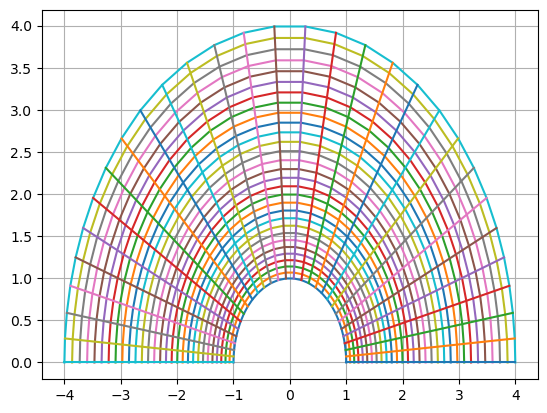

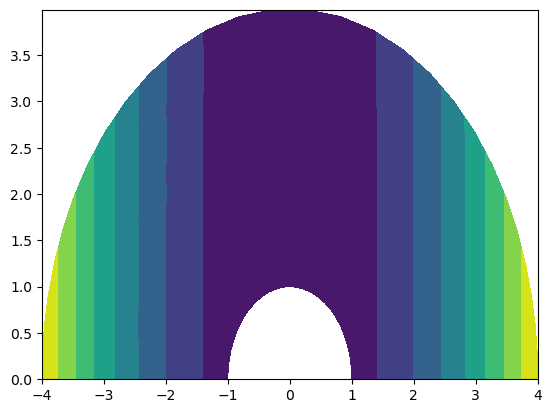

In [113]:
alpha = zeros((4,3,2))
# i =  len(knots&)-2-1  ; j = len(knots2)-2-1 ; d = 2 
alpha[0,0,:] = [1,0]
alpha[0,1,:] =[2,0] 
alpha[0,2,:] =[4,0]

alpha[1,0,:] =[1,1]
alpha[1,1,:] =[2,2]
alpha[1,2,:] =[4,4]

# alpha[2,0,:] =[0.,1.]
# alpha[2,1,:] = [0,2]
# alpha[2,2,:] =  [0,4]

alpha[2,0,:] = [-1,1] 
alpha[2,1,:] = [-2,2]
alpha[2,2,:] = [-4,4]

alpha[3, 0,:] = [-1,0]
alpha[3, 1,:] =[-2,0]
alpha[3, 2,:] = [-4,0]
alpha[:,:,1] *= 2
from numpy import sqrt
degree_1 = 3
degree_2 = 2
w1 = [1,1/3,1/3,1]
w2 =[1,1,1]

knots_1 = [0., 0., 0.,0,1,1, 1., 1.]
knots_2 = [0., 0., 0., 1., 1., 1.]
print(linspace(knots_1[degree_1],knots_1[-degree_1-1], 9))

S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=30, ny=30)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[0]):
    plt.plot(X[:,i],Y[:,i])
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i])
# plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
# plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
plt.savefig("LADEMI_CYLINDRE_USA.png")
plt.grid()
plt.show()


fig = plt.figure()
Z = X**2
plt.contourf(X,Y,Z)
plt.show()

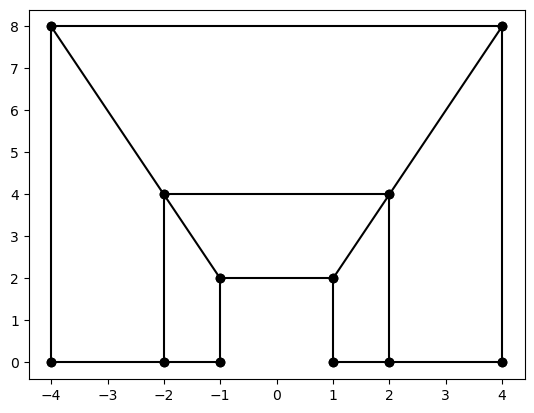

In [114]:
plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
plt.savefig("controlepoly.png")

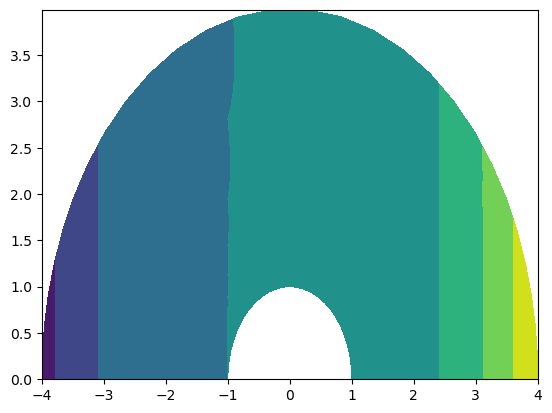

In [115]:
fig = plt.figure()
Z = X**2+X**3
plt.contourf(X,Y,Z)
plt.show()

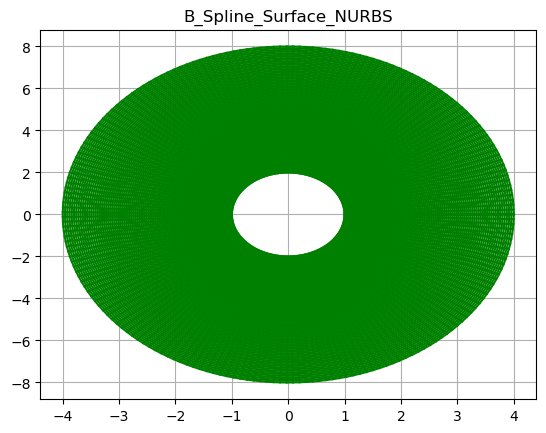

In [108]:
alpha = zeros((9,3,2))

# i =  len(knots&)-2-1  ; j = len(knots2)-2-1 ; d = 2 
alpha[0,0,:] = [1,0]
alpha[0,1,:] =[2,0] 
alpha[0,2,:] =[4,0]

alpha[1,0,:] =[1,1]
alpha[1,1,:] =[2,2]

alpha[1,2,:] =[4,4]

alpha[2,0,:] =[0.,1.]
alpha[2,1,:] = [0,2]
alpha[2,2,:] =  [0,4]

alpha[3,0,:] = [-1,1] 
alpha[3,1,:] = [-2,2]
alpha[3,2,:] = [-4,4]

alpha[4,0,:] = [-1,0]
alpha[4,1,:] =[-2,0]
alpha[4,2,:] = [-4,0]
alpha[:,:,1] *= 2
for i in range(4):
    for j in range(3):
        alpha[4+i+1,j,:] = alpha[3-i,j,:] 
alpha[4:,:,1] *= -1
#alpha[3:,2:,0] = alpha[3:,2:,0].T
#alpha[3:,2:,1] = alpha[3:,2:,1].T

from numpy import sqrt
degree_1 = 2
degree_2 = 2
w1 = [1,1/sqrt(2),1,1/sqrt(2),1,1/sqrt(2),1,1/sqrt(2),1]
w2 =[1,1,1]

knots_1 = [0., 0., 0.,1/4,1/4,1/2,1/2,3/4,3/4,1, 1., 1.]
knots_2 = [0., 0., 0., 1., 1., 1.]

S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=200, ny=100)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')
plt.savefig("Rational_B_Spline_SurfaceUSA.png")
# plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
# plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
plt.title("B_Spline_Surface_NURBS")
plt.grid()
plt.show()


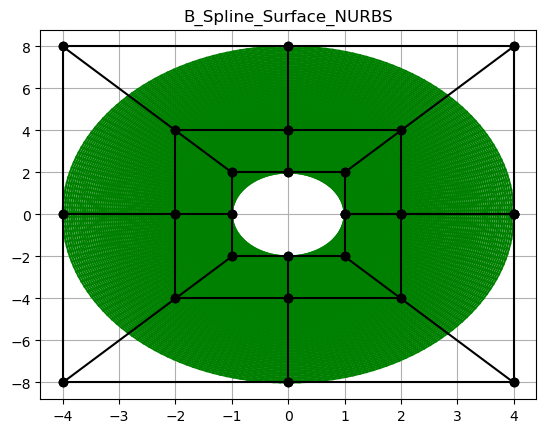

In [110]:
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=200, ny=100)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')
plt.savefig("Rational_B_Spline_SurfaceUSA.png")
plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
plt.title("B_Spline_Surface_NURBS")
plt.grid()
plt.show()

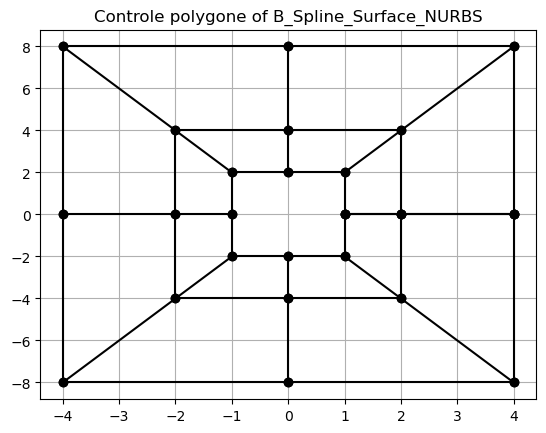

In [111]:

plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
plt.title("Controle polygone of B_Spline_Surface_NURBS")
plt.grid()
plt.savefig("Rational_B_Spline_S9999999.png")
plt.show()


[1. 1. 1. 1. 1. 1. 1. 1. 1.] [1, 1, 1]


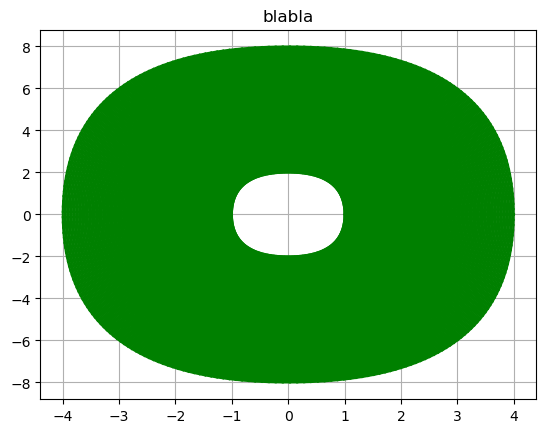

In [112]:
alpha = zeros((9,3,2))

# i =  len(knots&)-2-1  ; j = len(knots2)-2-1 ; d = 2 
alpha[0,0,:] = [1,0]
alpha[0,1,:] =[2,0] 
alpha[0,2,:] =[4,0]

alpha[1,0,:] =[1,1]
alpha[1,1,:] =[2,2]

alpha[1,2,:] =[4,4]

alpha[2,0,:] =[0.,1.]
alpha[2,1,:] = [0,2]
alpha[2,2,:] =  [0,4]

alpha[3,0,:] = [-1,1] 
alpha[3,1,:] = [-2,2]
alpha[3,2,:] = [-4,4]

alpha[4,0,:] = [-1,0]
alpha[4,1,:] =[-2,0]
alpha[4,2,:] = [-4,0]
alpha[:,:,1] *= 2
for i in range(4):
    for j in range(3):
        alpha[4+i+1,j,:] = alpha[3-i,j,:] 
alpha[4:,:,1] *= -1
#alpha[3:,2:,0] = alpha[3:,2:,0].T
#alpha[3:,2:,1] = alpha[3:,2:,1].T

from numpy import sqrt
degree_1 = 2
degree_2 = 2
w1 = ones(len([1,1/sqrt(2),1,1/sqrt(2),1,1/sqrt(2),1,1/sqrt(2),1]))
w2 =[1,1,1]

knots_1 = [0., 0., 0.,1/4,1/4,1/2,1/2,3/4,3/4,1, 1., 1.]
knots_2 = [0., 0., 0., 1., 1., 1.]
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=250, ny=150)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')
print(w1,w2)
# plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
# plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
plt.title("blabla")
plt.grid()
plt.show()


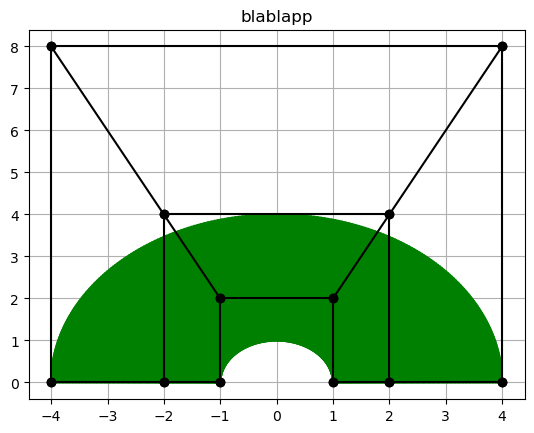

In [116]:
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=250, ny=150)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')
plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
plt.title("blablapp")
plt.grid()
plt.savefig("iiiiiiiiiiiiii.png")
plt.show()

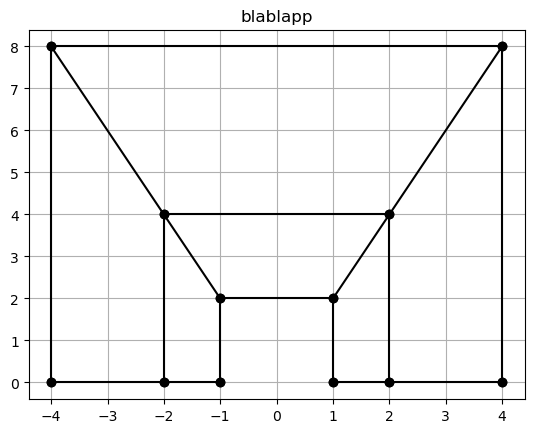

In [117]:
plt.plot(alpha[:,:,0],alpha[:,:,1], '-ok')
plt.plot(alpha[:,:,0].T,alpha[:,:,1].T, '-ok')
plt.title("blablapp")
plt.grid()
plt.savefig("iiiiiiiiiiiiii.png")
plt.show()

In [118]:
# N = 3
# M = 4
# e  = zeros((N,M,1)) 
# e[0:2,:,0]=[[1,1,1,1],[1,1,1,1]]

# for i in range(2):
#     e[i,:,0]=ones(4)
# e = zeros(1)
# e[0]
1D_Codes/fields

SyntaxError: invalid decimal literal (3654961473.py, line 10)

In [119]:
import numpy as np
#name_geo = 'Butterfly'
nelements = 16 
name_geo = 'Butterfly'
# y_2_30
mx = np.loadtxt('fields/'+name_geo+'x_2_'+str(nelements)+'.txt')
my = np.loadtxt('fields/'+name_geo+'y_2_'+str(nelements)+'.txt')

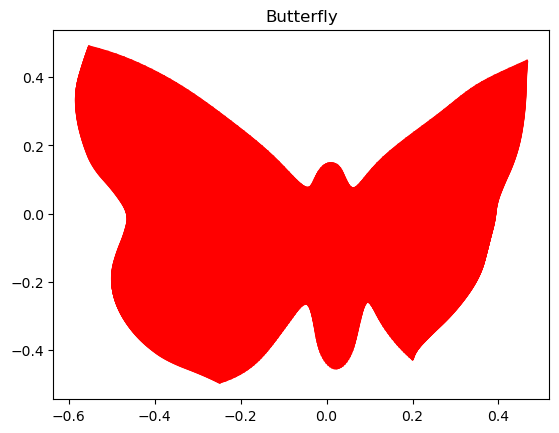

In [120]:
degree        = 2
nbases        = nelements+degree
grid          = np.linspace(0,1,nelements +1)
knots_1       = make_knots(grid,degree)
knots_2       = make_knots(grid,degree)
w1            = list(np.zeros(nbases)+1.)
w2            = w1
alpha         = np.zeros((nbases, nbases, 2))
alpha[:,:, 0] = mx[:,:]
alpha[:,:, 1] = my[:,:]
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=100, ny=1100)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'r')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'r')

# plt.plot(mx[:,:],my[:,:], '-ok')
# plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("Butterfly.png")
#plt.grid()
plt.show()

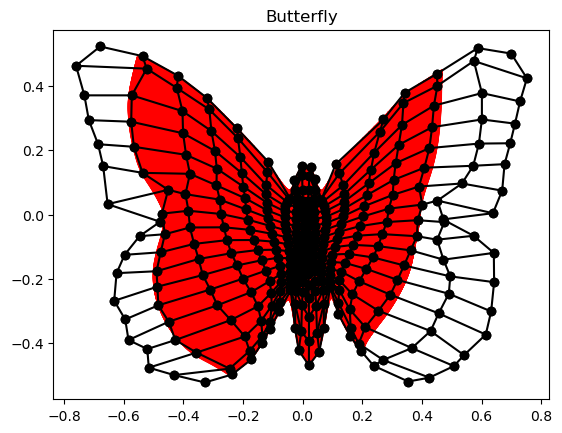

In [121]:
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=100, ny=1100)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'r')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'r')

plt.plot(mx[:,:],my[:,:], '-ok')
plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("Butterflywithpoly.png")
#plt.grid()
plt.show()

In [ ]:
import numpy as np
#name_geo = 'Butterfly'
nelements = 30  
name_geo = 'Bear'
# y_2_30
# nelements = 16
mx = np.loadtxt('fields/'+name_geo+'x_2_'+str(nelements)+'.txt')
my = np.loadtxt('fields/'+name_geo+'y_2_'+str(nelements)+'.txt')#prologate mapping by knot insertion


In [ ]:
degree        = 2
nbases        = nelements+degree
grid          = np.linspace(0,1,nelements +1)
knots_1       = make_knots(grid,degree)
knots_2       = make_knots(grid,degree)
w1            = list(np.zeros(nbases)+1.)
w2            = w1
alpha         = np.zeros((nbases, nbases, 2))
alpha[:,:, 0] = mx[:,:]
alpha[:,:, 1] = my[:,:]
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=300, ny=300)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')

# plt.plot(mx[:,:],my[:,:], '-ok')
# plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("Bear.png")
#plt.grid()
plt.show()

In [ ]:
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=300, ny=300)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')

plt.plot(mx[:,:],my[:,:], '-ok')
plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("Bearwithpoly.png")
#plt.grid()
plt.show()

In [ ]:
plt.plot(mx[:,:],my[:,:], '-ok')
plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.savefig("polyBear.png")

plt.show()

In [ ]:
import numpy as np
#name_geo = 'Butterfly'
nelements = 16 
name_geo = 'Circle'
# y_2_30
mx = np.loadtxt('fields/'+name_geo+'x_2_'+str(nelements)+'.txt')
my = np.loadtxt('fields/'+name_geo+'y_2_'+str(nelements)+'.txt')

In [ ]:
degree        = 2
nbases        = nelements+degree
grid          = np.linspace(0,1,nelements +1)
knots_1       = make_knots(grid,degree)
knots_2       = make_knots(grid,degree)
w1            = list(np.zeros(nbases)+1.)
w2            = w1
alpha         = np.zeros((nbases, nbases, 2))
alpha[:,:, 0] = mx[:,:]
alpha[:,:, 1] = my[:,:]
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=250, ny=250)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')

# plt.plot(mx[:,:],my[:,:], '-ok')
# plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("Circle1.png")
#plt.grid()
plt.show()

In [ ]:
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=250, ny=250)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')

plt.plot(mx[:,:],my[:,:], '-ok')
plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("Circle1withpoly.png")
#plt.grid()
plt.show()

In [ ]:


plt.plot(mx[:,:],my[:,:], '-ok')
plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("polyCircle1.png")
#plt.grid()
plt.show()

In [ ]:
import numpy as np
#name_geo = 'Butterfly'
nelements = 16 
name_geo = 'DUCK'
# y_2_30
mx = np.loadtxt('fields/'+name_geo+'x_2_'+str(nelements)+'.txt')
my = np.loadtxt('fields/'+name_geo+'y_2_'+str(nelements)+'.txt')

In [ ]:
degree        = 2
nbases        = nelements+degree
grid          = np.linspace(0,1,nelements +1)
knots_1       = make_knots(grid,degree)
knots_2       = make_knots(grid,degree)
w1            = list(np.zeros(nbases)+1.)
w2            = w1
alpha         = np.zeros((nbases, nbases, 2))
alpha[:,:, 0] = mx[:,:]
alpha[:,:, 1] = my[:,:]
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=300, ny=300)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')

# plt.plot(mx[:,:],my[:,:], '-ok')
# plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("DUCK1.png")
#plt.grid()
plt.show()

In [ ]:
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=300, ny=300)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')

plt.plot(mx[:,:],my[:,:], '-ok')
plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("DUCKwithpoly.png")
#plt.grid()
plt.show()

In [ ]:
plt.plot(mx[:,:],my[:,:], '-ok')
plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("polyDUCK1.png")
#plt.grid()
plt.show()

In [ ]:
import numpy as np
#name_geo = 'Butterfly'
nelements = 16 
name_geo = 'Male_rotor'
# y_2_30
mx = np.loadtxt('fields/'+name_geo+'x_2_'+str(nelements)+'.txt')
my = np.loadtxt('fields/'+name_geo+'y_2_'+str(nelements)+'.txt')

In [ ]:
degree        = 2
nbases        = nelements+degree
grid          = np.linspace(0,1,nelements +1)
knots_1       = make_knots(grid,degree)
knots_2       = make_knots(grid,degree)
w1            = list(np.zeros(nbases)+1.)
w2            = w1
alpha         = np.zeros((nbases, nbases, 2))
alpha[:,:, 0] = mx[:,:]
alpha[:,:, 1] = my[:,:]
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=200, ny=200)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')

# plt.plot(mx[:,:],my[:,:], '-ok')
# plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("Male_rotor11111111111.png")
#plt.grid()
plt.show()

In [ ]:
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=200, ny=200)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')

plt.plot(mx[:,:],my[:,:], '-ok')
plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("Male_rotor111.png")
#plt.grid()
plt.show()

In [ ]:
plt.plot(mx[:,:],my[:,:], '-ok')
plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("poly_Male_rotor.png")
#plt.grid()
plt.show()

In [ ]:
import numpy as np
#name_geo = 'Butterfly'
nelements = 16 
name_geo = 'Plan'
# y_2_30
mx = np.loadtxt('fields/'+name_geo+'x_2_'+str(nelements)+'.txt')
my = np.loadtxt('fields/'+name_geo+'y_2_'+str(nelements)+'.txt')

In [ ]:
degree        = 2
nbases        = nelements+degree
grid          = np.linspace(0,1,nelements +1)
knots_1       = make_knots(grid,degree)
knots_2       = make_knots(grid,degree)
w1            = list(np.zeros(nbases)+1.)
w2            = w1
alpha         = np.zeros((nbases, nbases, 2))
alpha[:,:, 0] = mx[:,:]
alpha[:,:, 1] = my[:,:]
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=200, ny=200)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')

# plt.plot(mx[:,:],my[:,:], '-ok')
# plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("Plan.png")
#plt.grid()
plt.show()

In [ ]:
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=200, ny=200)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')

plt.plot(mx[:,:],my[:,:], '-ok')
plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("PlanWwithpoly.png")
#plt.grid()
plt.show()

In [ ]:
plt.plot(mx[:,:],my[:,:], '-ok')
plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("polyPlan.png")
#plt.grid()
plt.show()

In [ ]:
import numpy as np
#name_geo = 'Butterfly'
nelements = 16 
name_geo = 'Quart'
# y_2_30
mx = np.loadtxt('fields/'+name_geo+'x_2_'+str(nelements)+'.txt')
my = np.loadtxt('fields/'+name_geo+'y_2_'+str(nelements)+'.txt')

In [ ]:
degree        = 2
nbases        = nelements+degree
grid          = np.linspace(0,1,nelements +1)
knots_1       = make_knots(grid,degree)
knots_2       = make_knots(grid,degree)
w1            = list(np.zeros(nbases)+1.)
w2            = w1
alpha         = np.zeros((nbases, nbases, 2))
alpha[:,:, 0] = mx[:,:]
alpha[:,:, 1] = my[:,:]
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=400, ny=400)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')

# plt.plot(mx[:,:],my[:,:], '-ok')
# plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("Quart11111.png")
#plt.grid()
plt.show()

In [ ]:
S = plot_R_surface_2D(knots_1, knots_2, alpha,degree_1, degree_2,w1,w2,  nx=400, ny=400)
fig = plt.figure()
X, Y = meshgrid(xs, ys)
X = S[:,:,0]
Y = S[:,:,1]
for i in range(X.shape[1]):
    plt.plot(X[:,i],Y[:,i],'g')
for i in range(X.shape[0]):
    plt.plot(X.T[:,i],Y.T[:,i],'g')

plt.plot(mx[:,:],my[:,:], '-ok')
plt.plot(mx[:,:].T,my[:,:].T, '-ok')
plt.title(name_geo)
plt.savefig("Quart.png")
#plt.grid()
plt.show()

In [ ]:
plt.plot(mx[:,:],my[:,:], '-ok')
plt.plot(mx[:,:].T,my[:,:].T, '-ok')

plt.savefig("polyQuart.png")